# Deep Learning Project Notebook

### Import modulde

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src import download_data,model,train,evaluate,preprocessed,loss
import importlib
import torch.nn as nn
import torch.optim as optim



C:\Users\coren\AppData\Local\Temp\ipykernel_35232\4054957999.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
importlib.reload(download_data)
importlib.reload(model)
importlib.reload(train)
importlib.reload(evaluate)
importlib.reload(preprocessed)
importlib.reload(loss)

<module 'src.preprocessed' from 'c:\\Users\\coren\\Projet Deep Learning\\Face_Generation-master\\CS230-1\\src\\preprocessed.py'>

### Download_data

In [3]:
download_data.download_data()

### Process data

In [4]:
num_input = preprocessed.preprocess_data_features()
temp,dev = preprocessed.split_dataset_dev()

## Declare Module

### Module 1 : one layer model

Epoch [1/100], Loss: 0.4513
Epoch [2/100], Loss: 0.4103
Epoch [3/100], Loss: 0.3888
Epoch [4/100], Loss: 0.3752
Epoch [5/100], Loss: 0.3669
Epoch [6/100], Loss: 0.3608
Epoch [7/100], Loss: 0.3561
Epoch [8/100], Loss: 0.3518
Epoch [9/100], Loss: 0.3487
Epoch [10/100], Loss: 0.3458
Epoch [11/100], Loss: 0.3425
Epoch [12/100], Loss: 0.3405
Epoch [13/100], Loss: 0.3384
Epoch [14/100], Loss: 0.3367
Epoch [15/100], Loss: 0.3350
Epoch [16/100], Loss: 0.3337
Epoch [17/100], Loss: 0.3325
Epoch [18/100], Loss: 0.3318
Epoch [19/100], Loss: 0.3312
Epoch [20/100], Loss: 0.3300
Epoch [21/100], Loss: 0.3296
Epoch [22/100], Loss: 0.3290
Epoch [23/100], Loss: 0.3286
Epoch [24/100], Loss: 0.3284
Epoch [25/100], Loss: 0.3279
Epoch [26/100], Loss: 0.3274
Epoch [27/100], Loss: 0.3271
Epoch [28/100], Loss: 0.3269
Epoch [29/100], Loss: 0.3264
Epoch [30/100], Loss: 0.3262
Epoch [31/100], Loss: 0.3261
Epoch [32/100], Loss: 0.3259
Epoch [33/100], Loss: 0.3254
Epoch [34/100], Loss: 0.3252
Epoch [35/100], Loss: 0

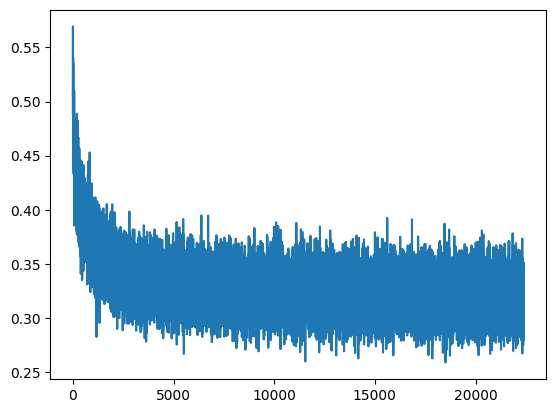

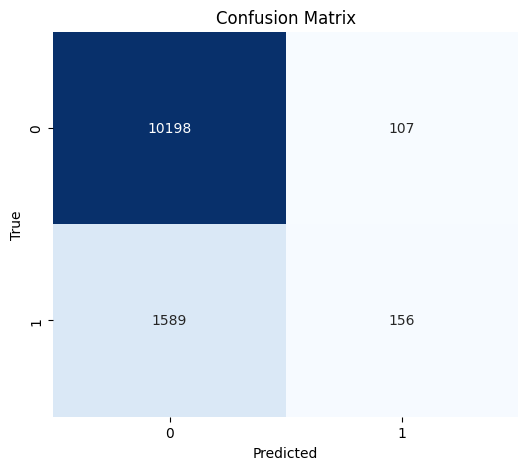

{'accuracy': 0.859253112033195,
 'f1_score': 0.1553784860557769,
 'false_positive': 107,
 'false_negative': 1589}

In [5]:
num_hidden_neurone = 40
model_one_layer = model.create_sequential_model(num_input,[num_hidden_neurone],dropout_rates=0.1)
criterion = loss.WeightedBCELoss(w1 = 5.0, w2 = 1.0)
optimizer = optim.Adam(model_one_layer.parameters(), lr=0.0001,betas= (0.9,0.99))

train_losses,test_data = train.train_model(temp,model_one_layer,criterion,optimizer,100,batch_size=1024)
plt.plot(train_losses)

evaluate.evaluate_model(model_one_layer,test_data)

### Model 2 : MLP

Epoch [1/100], Loss: 0.6115
Epoch [2/100], Loss: 0.4804
Epoch [3/100], Loss: 0.4479
Epoch [4/100], Loss: 0.4458
Epoch [5/100], Loss: 0.4407
Epoch [6/100], Loss: 0.4319
Epoch [7/100], Loss: 0.4280
Epoch [8/100], Loss: 0.4250
Epoch [9/100], Loss: 0.4208
Epoch [10/100], Loss: 0.4157
Epoch [11/100], Loss: 0.4131
Epoch [12/100], Loss: 0.4117
Epoch [13/100], Loss: 0.4056
Epoch [14/100], Loss: 0.4024
Epoch [15/100], Loss: 0.3981
Epoch [16/100], Loss: 0.3929
Epoch [17/100], Loss: 0.3929
Epoch [18/100], Loss: 0.3929
Epoch [19/100], Loss: 0.3896
Epoch [20/100], Loss: 0.3870
Epoch [21/100], Loss: 0.3845
Epoch [22/100], Loss: 0.3820
Epoch [23/100], Loss: 0.3821
Epoch [24/100], Loss: 0.3779
Epoch [25/100], Loss: 0.3766
Epoch [26/100], Loss: 0.3739
Epoch [27/100], Loss: 0.3754
Epoch [28/100], Loss: 0.3729
Epoch [29/100], Loss: 0.3741
Epoch [30/100], Loss: 0.3720
Epoch [31/100], Loss: 0.3725
Epoch [32/100], Loss: 0.3716
Epoch [33/100], Loss: 0.3678
Epoch [34/100], Loss: 0.3687
Epoch [35/100], Loss: 0

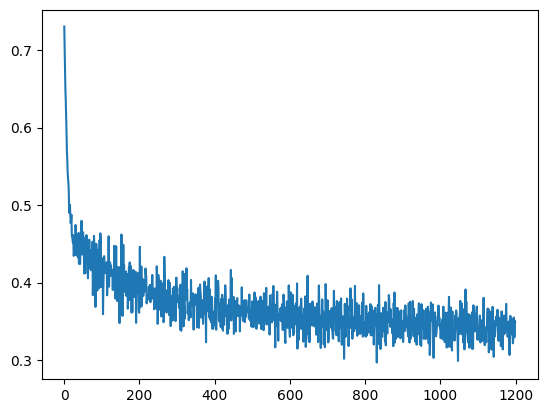

In [91]:
hidden_layers = [200,200,70]
model_mlp = model.create_sequential_model(num_input,hidden_layers,dropout_rates=0.2)
criterion = loss.WeightedBCELoss(w1 = 5.0, w2 = 1.0)
optimizer = optim.Adam(model_one_layer.parameters(), lr=0.0001,betas= (0.9,0.99))

train_losses,test_data = train.train_model(temp,model_one_layer,criterion,optimizer,100,batch_size=1024)
plt.plot(train_losses)

evaluate.evaluate_model(model_one_layer,test_data)